# tabagisme et cancer de poumon

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df= pd.read_csv(r'Smoking_Cancer_Clean_4000rows.csv')
df

,Patient_ID,AGE,GENDER,SMOKING_STATUS,CIGARETTES_PER_DAY,YEARS_SMOKING,EXPOSURE_TO_SECONDHAND_SMOKE,ALCOHOL_CONSUMPTION,BMI,PHYSICAL_ACTIVITY_LEVEL,LUNG_CANCER,SURVIVAL_YEARS
0,1,63,M,Former,28,38,No,Yes,32.2,Moderate,Yes,2.5
1,2,76,M,Current,30,3,No,No,25.4,High,No,9.9
2,3,53,F,Former,24,34,No,Yes,18.1,Low,Yes,6.7
3,4,39,F,Current,23,46,No,Yes,32.9,High,Yes,2.9
4,5,67,F,Never,18,35,No,No,32.9,Moderate,No,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,54,F,Former,38,5,Yes,Yes,18.3,Low,No,2.6
3996,3997,57,M,Former,9,45,No,No,30.4,Low,No,4.0
3997,3998,60,M,Current,16,32,No,Yes,30.1,High,No,8.4
3998,3999,42,M,Former,6,48,No,No,29.1,Low,No,6.3


In [3]:
# Dimensions du dataset
print("Shape:", df.shape)


print('='*70)
# Vérification des valeurs manquantes
print(df.isnull().sum())
print('='*70)
print(df.columns)
print('='*70)
print(df.info())
print('='*70) 


Shape: (4000, 12)
Patient_ID                      0
AGE                             0
GENDER                          0
SMOKING_STATUS                  0
CIGARETTES_PER_DAY              0
YEARS_SMOKING                   0
EXPOSURE_TO_SECONDHAND_SMOKE    0
ALCOHOL_CONSUMPTION             0
BMI                             0
PHYSICAL_ACTIVITY_LEVEL         0
LUNG_CANCER                     0
SURVIVAL_YEARS                  0
dtype: int64
Index(['Patient_ID', 'AGE', 'GENDER', 'SMOKING_STATUS', 'CIGARETTES_PER_DAY',
       'YEARS_SMOKING', 'EXPOSURE_TO_SECONDHAND_SMOKE', 'ALCOHOL_CONSUMPTION',
       'BMI', 'PHYSICAL_ACTIVITY_LEVEL', 'LUNG_CANCER', 'SURVIVAL_YEARS'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    4000 non-null   int64  
 1   AGE               

# Analyse exploratoire des données des patients

Dans cette section, nous allons commencer par **explorer le dataset** afin de mieux comprendre sa structure et la qualité des données. L'objectif est de répondre aux questions suivantes :

1. **Dimensions du dataset** : Combien de lignes (patients) et de colonnes (variables) contient le fichier.  
2. **Valeurs manquantes** : Vérifier si certaines variables ont des données manquantes qui pourraient affecter l'analyse.  
3. **Liste des colonnes** : Identifier toutes les variables disponibles dans le dataset.  
4. **Types de données** : Vérifier les types de chaque colonne (numérique, catégorielle, objet) pour savoir si une conversion ou un nettoyage est nécessaire avant l'analyse.  

Cette étape est essentielle pour préparer les données avant toute analyse statistique ou visualisation.


# Statistiques descriptives essentielles

Avant d'aller plus loin dans l'analyse, il est important de résumer les **caractéristiques principales** du dataset :

In [4]:
df.describe()

,Patient_ID,AGE,CIGARETTES_PER_DAY,YEARS_SMOKING,BMI,SURVIVAL_YEARS
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,52.139000,19.292500,24.346500,26.414500,5.073175
std,1154.844867,15.799291,11.346745,14.380565,4.909527,2.876802
min,1.000000,25.000000,0.000000,0.000000,18.000000,0.000000
25%,1000.750000,39.000000,10.000000,12.000000,22.100000,2.600000
50%,2000.500000,52.000000,19.000000,24.000000,26.400000,5.100000
75%,3000.250000,66.000000,29.000000,37.000000,30.625000,7.500000
max,4000.000000,79.000000,39.000000,49.000000,35.000000,10.000000


# les histogramme des variable quantitative

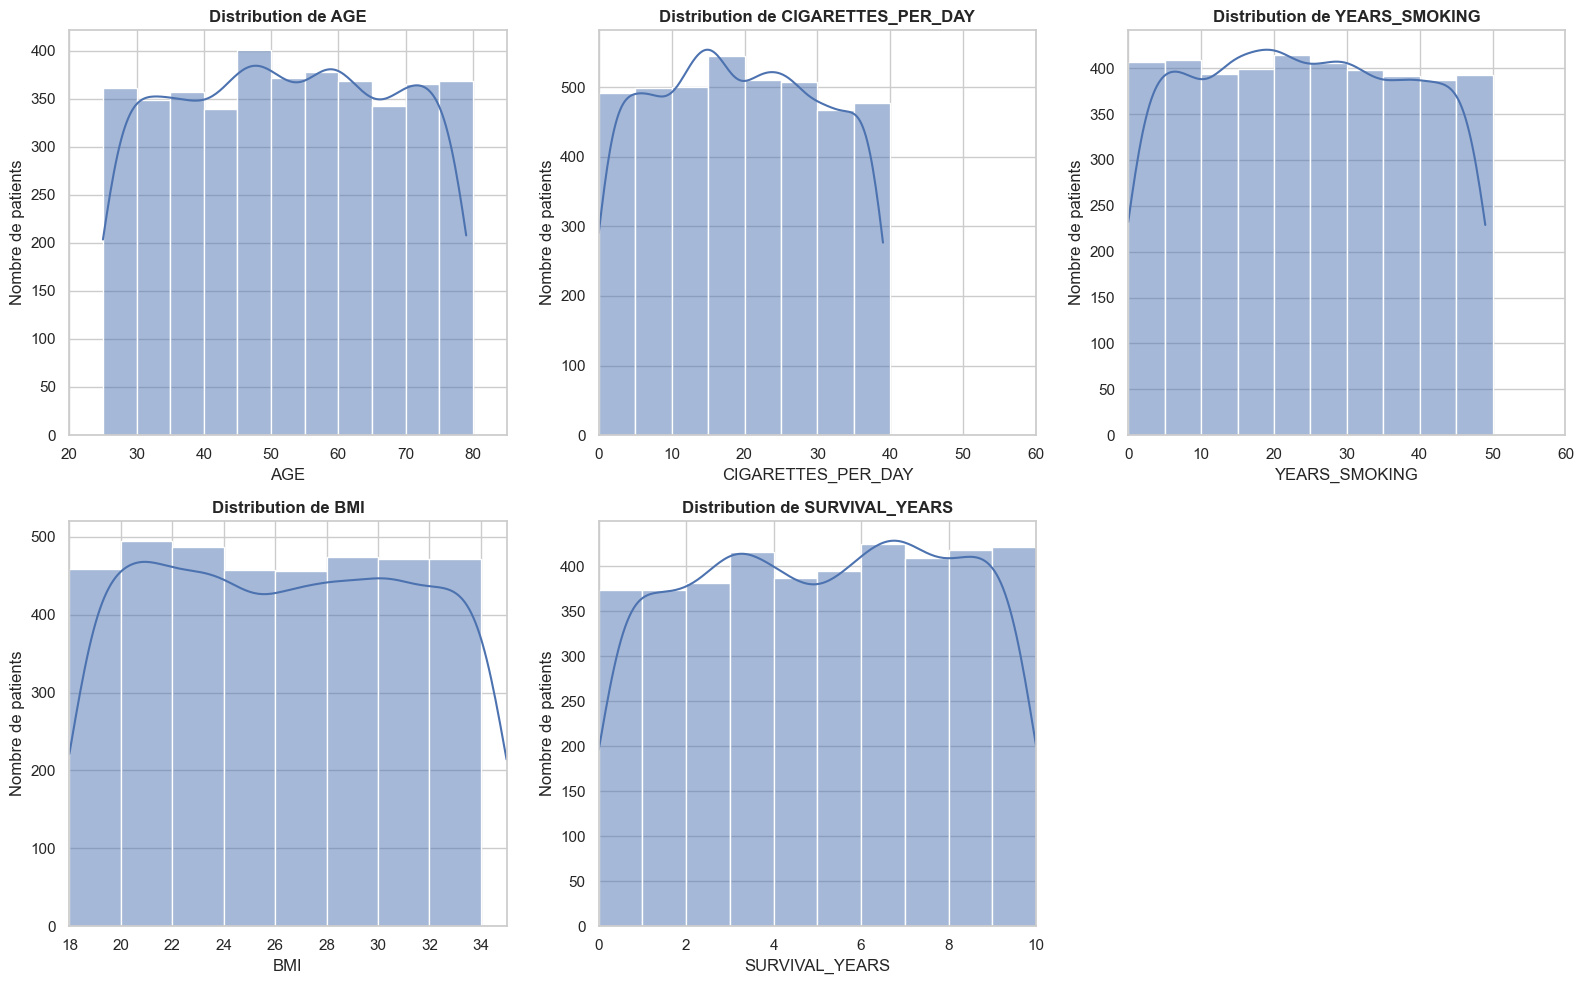

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (16,10)

numerical_cols = ['AGE', 'CIGARETTES_PER_DAY', 'YEARS_SMOKING', 'BMI', 'SURVIVAL_YEARS']

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    # Récupérer les limites réelles des données
    col_min = df[col].min()
    col_max = df[col].max()

    if col == 'AGE':
        bins = range(20, 90, 5)
        axes[i].set_xlim(20, 85)

    elif col == 'CIGARETTES_PER_DAY':
        bins = range(0, 61, 5)
        axes[i].set_xlim(0, 60)

    elif col == 'YEARS_SMOKING':
        bins = range(0, 61, 5)
        axes[i].set_xlim(0, 60)

    elif col == 'BMI':
        bins = range(int(col_min), int(col_max)+1, 2)
        axes[i].set_xlim(col_min, col_max)

    elif col == 'SURVIVAL_YEARS':
        bins = range(int(col_min), int(col_max)+1, 1)
        axes[i].set_xlim(col_min, col_max)

    sns.histplot(df[col], bins=bins, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution de {col}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Nombre de patients")

# Supprimer case vide
if len(numerical_cols) < len(axes):
    for j in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Les variables qualitative 

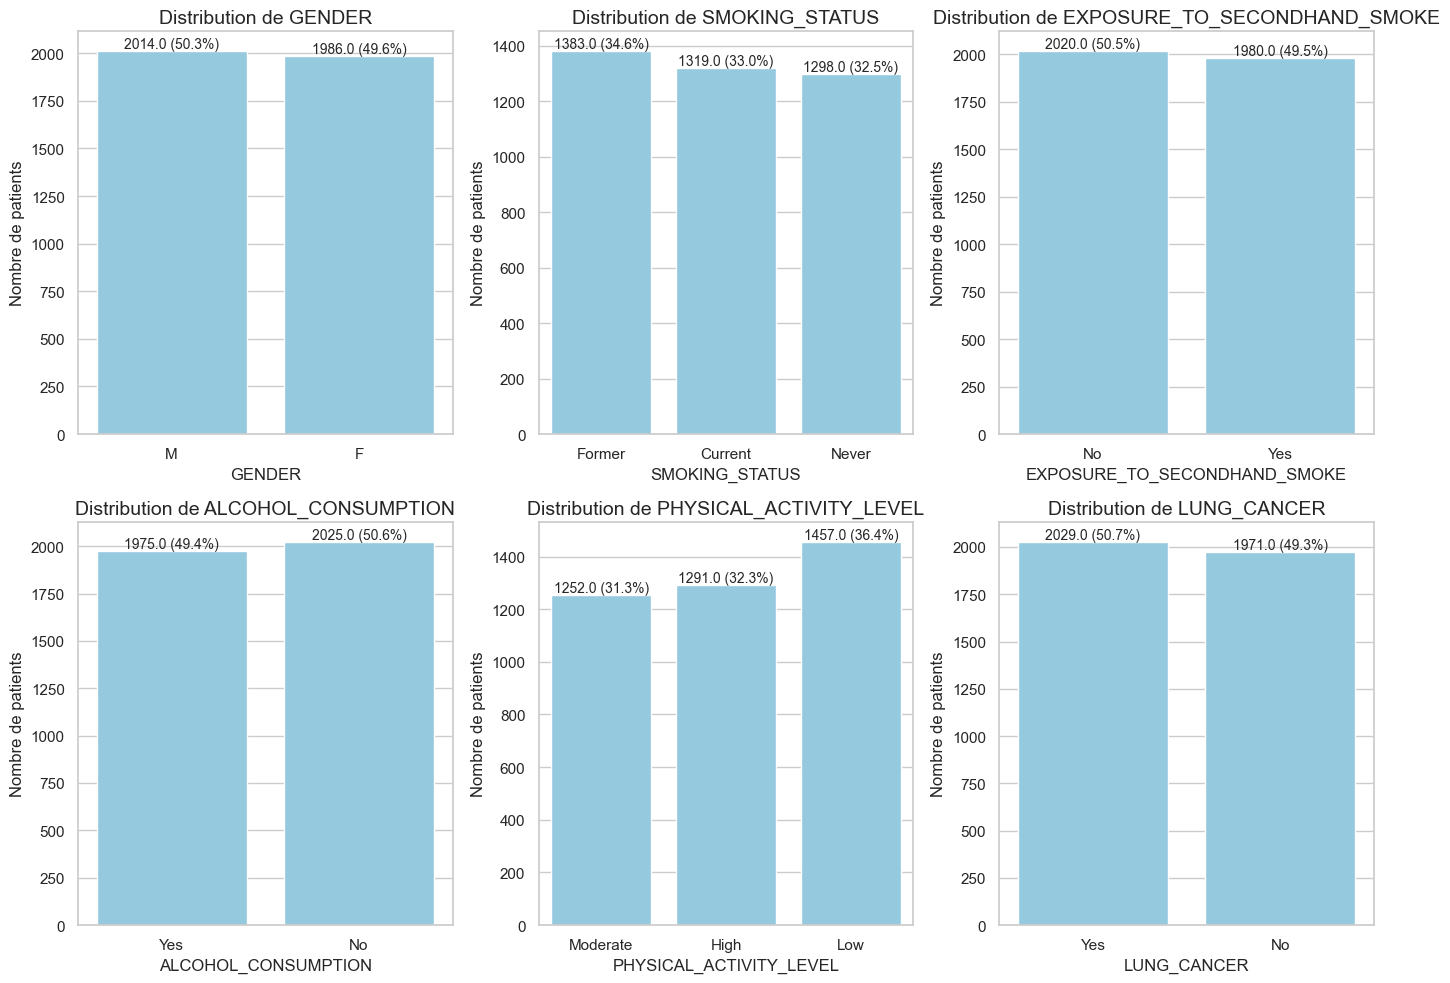

In [6]:
# Configurer l'affichage
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)  # Taille globale de la figure

categorical_cols = ['GENDER', 'SMOKING_STATUS', 'EXPOSURE_TO_SECONDHAND_SMOKE',
                    'ALCOHOL_CONSUMPTION', 'PHYSICAL_ACTIVITY_LEVEL', 'LUNG_CANCER']

# Création de subplots : 2 lignes x 3 colonnes (6 graphiques)
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution de {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Nombre de patients", fontsize=12)
    
    # Ajouter le nombre et le pourcentage sur chaque barre
    total = len(df)
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height} ({height/total:.1%})', 
                         (p.get_x() + p.get_width()/2., height), 
                         ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

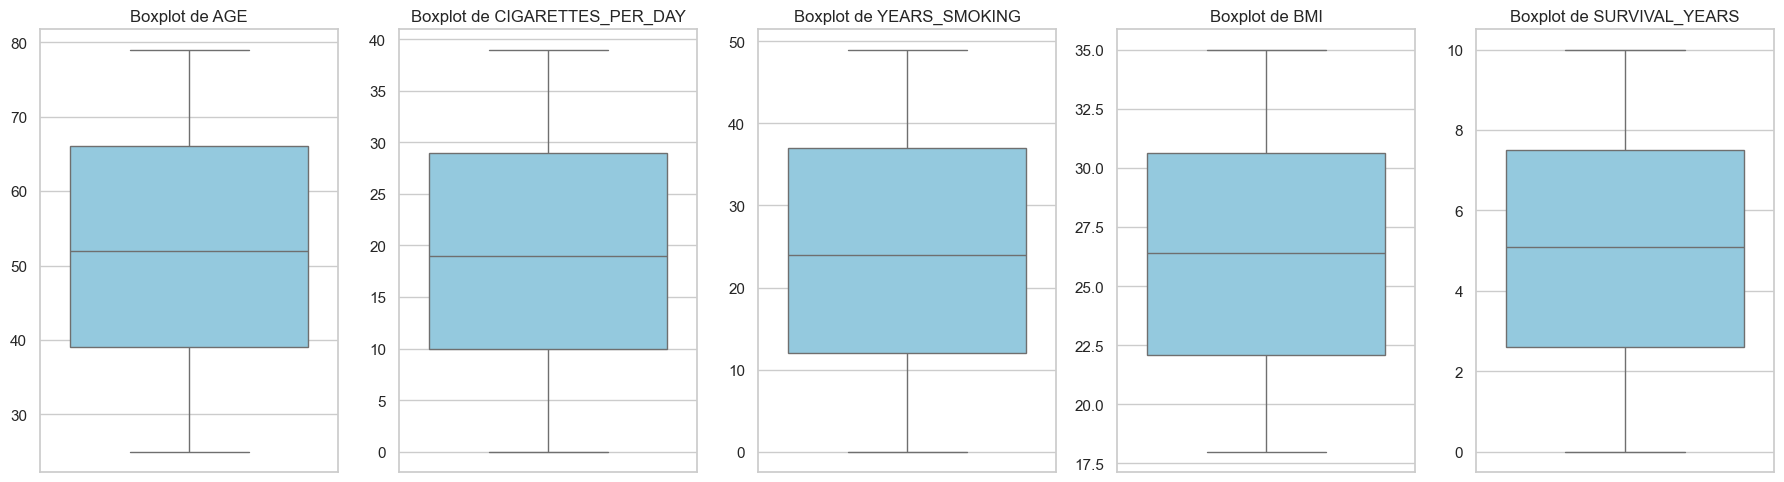

In [7]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14,8)

numerical_cols = ['AGE', 'CIGARETTES_PER_DAY', 'YEARS_SMOKING', 'BMI', 'SURVIVAL_YEARS']
#colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'violet']

# Création d'une figure avec 1 ligne par variable
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(18,5))  # 1 ligne, plusieurs colonnes

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')  # Pas nécessaire si on veut garder compact

plt.tight_layout()
plt.show()

# LE CAS D ' ECHANTIONNAGE
L’échantillonnage consiste à sélectionner un sous-ensemble représentatif d’une population pour estimer ses caractéristiques.

La moyenne et la proportion de l’échantillon approximativement reflètent celles de la population : 


La marge d’erreur (ME) quantifie l’incertitude de l’estimation : 
ME=Z×sn
ME=Z×
n

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Supposons que df est ton dataset complet
# df = pd.read_csv("ton_dataset.csv")
N = df.shape[0]
n = 900  # taille de l'échantillon

# -------------------------------
# 1️⃣ Échantillonnage aléatoire simple
sample_random = df.sample(n=n, random_state=42)
print("Aléatoire simple:", sample_random.shape)

# -------------------------------
# 2️⃣ Échantillonnage systématique
k = N // n  # intervalle pour sélectionner chaque k-ième ligne
sample_systematic = df.iloc[::k].head(n)
print("Systématique:", sample_systematic.shape)

# -------------------------------
# 3️⃣ Échantillonnage stratifié
# Supposons qu'on stratifie selon 'SMOKING_STATUS'
# On utilise train_test_split pour conserver les proportions
sample_stratified, _ = train_test_split(df, stratify=df['SMOKING_STATUS'], train_size=n, random_state=42)
print("Stratifié:", sample_stratified.shape)

# -------------------------------
# 4️⃣ Échantillonnage par grappes (clusters)
# Supposons qu'on a une colonne 'GROUP' indiquant les grappes
# Ici, on simule des grappes par groupe de 50 lignes
df['GROUP'] = df.index // 50  # création de grappes fictives
clusters = df['GROUP'].unique()
np.random.seed(42)
selected_clusters = np.random.choice(clusters, size=int(np.ceil(n/50)), replace=False)
sample_cluster = df[df['GROUP'].isin(selected_clusters)].head(n)
print("Par grappes:", sample_cluster.shape)


Aléatoire simple: (900, 12)
Systématique: (900, 12)
Stratifié: (900, 12)
Par grappes: (900, 13)


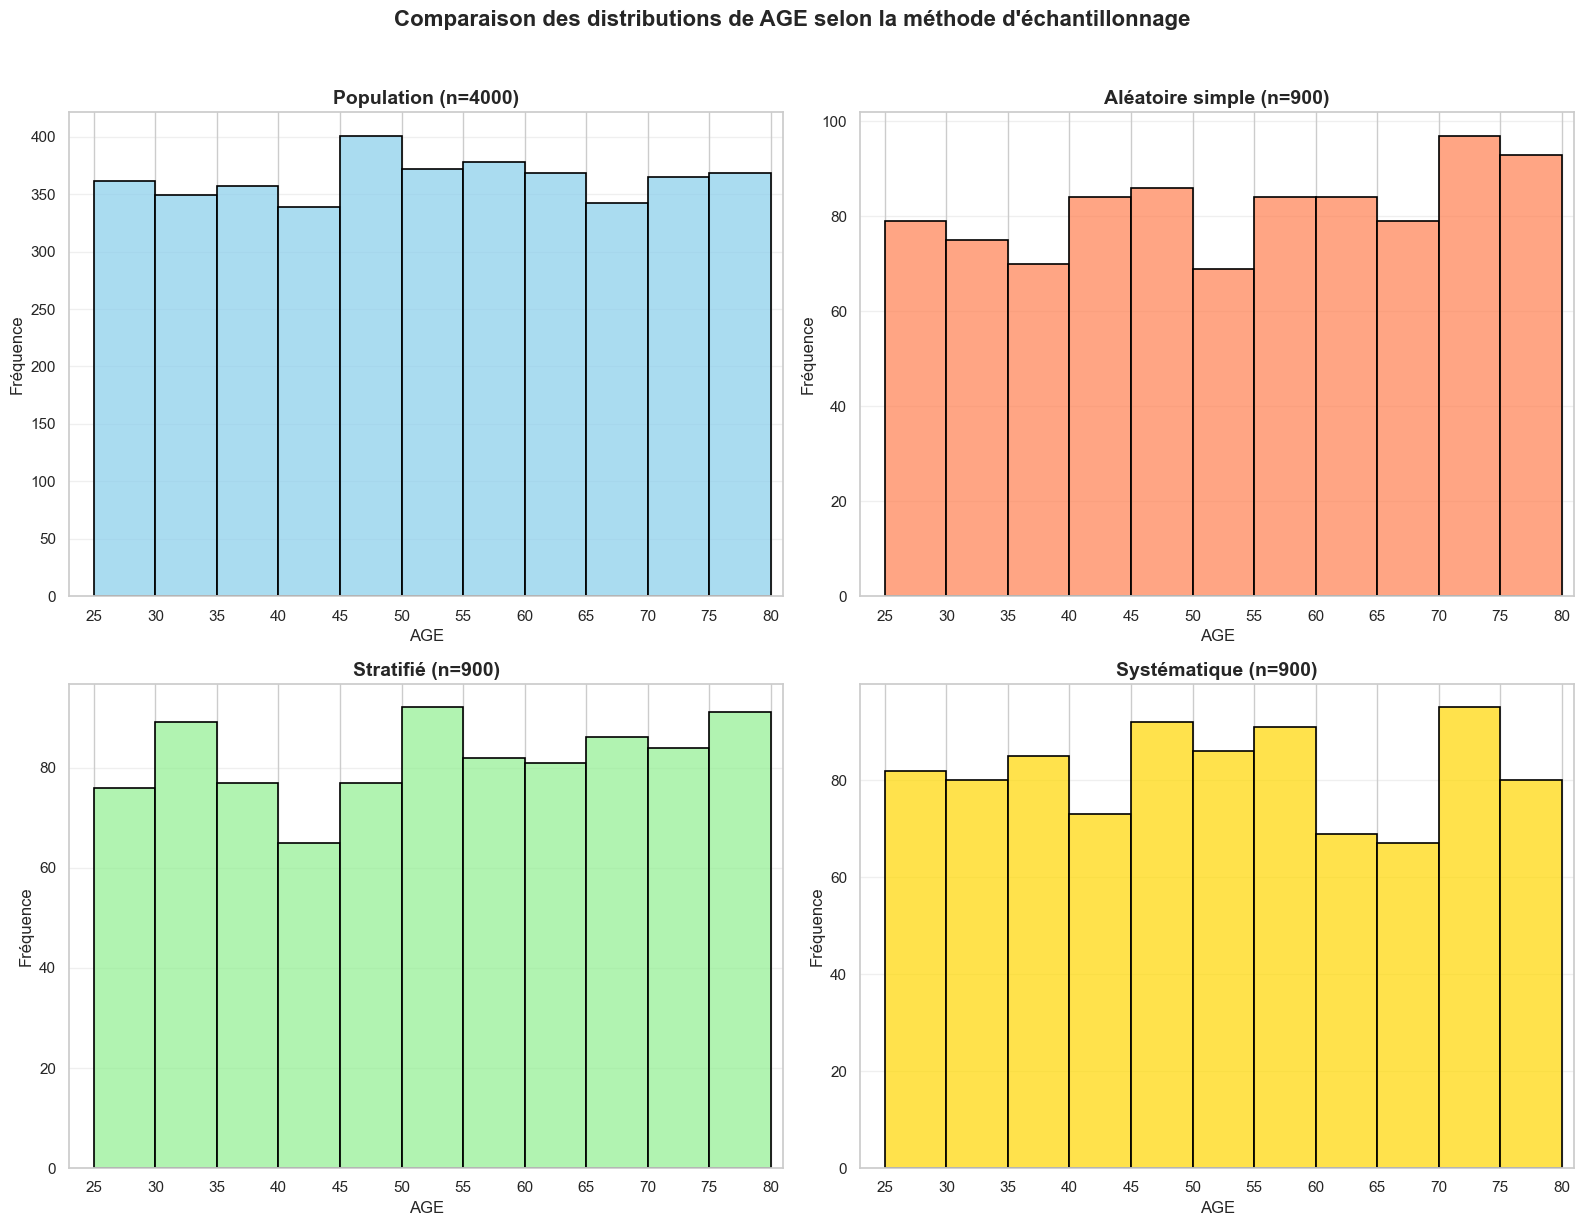

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Exemple : votre dataset principal et trois échantillons
# df = votre DataFrame complet
# sample_random, sample_stratified, sample_systematic doivent être déjà définis

quant_var = 'AGE'

# Définir les bins explicites (ici largeur 5)
x_min = df[quant_var].min()
x_max = df[quant_var].max()
bins = np.arange(x_min, x_max + 5, 5)

# Créer la figure avec 2x2 sous-graphes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Listes pour itérer
datasets = [df, sample_random, sample_stratified, sample_systematic]
titles = [
    f'Population (n={len(df)})', 
    f'Aléatoire simple (n={len(sample_random)})', 
    f'Stratifié (n={len(sample_stratified)})', 
    f'Systématique (n={len(sample_systematic)})'
]
colors = ['skyblue', 'coral', 'lightgreen', 'gold']

# Boucle pour tracer chaque histogramme
for ax, data, title, color in zip(axes.flatten(), datasets, titles, colors):
    sns.histplot(
        data[quant_var], 
        bins=bins,      # Bins définis
        kde=False,      # KDE non nécessaire si fréquence
        color=color, 
        ax=ax,
        stat='count',   # ← Affiche la fréquence
        alpha=0.7,
        edgecolor='black',
        linewidth=1.2
    )
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlim(x_min - 2, x_max + 2)
    ax.set_xlabel(quant_var, fontsize=12)
    ax.set_ylabel('Fréquence', fontsize=12)  # Axe Y en fréquence
    ax.set_xticks(bins)
    ax.grid(True, alpha=0.3, axis='y')

# Titre général
plt.suptitle(f'Comparaison des distributions de {quant_var} selon la méthode d\'échantillonnage', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


# Visualisations bivariées 

 Produire et analyser correctement des graphiques simples.
— Réalisation de bar charts, scatter plots.
— Interprétation claire (expliquer ce que le graphique montre).
— Identification de pièges (mauvaises échelles, camemberts trompeurs).


# A) Qualitative vs Qualitative
LUNG_CANCER selon SMOKING_STATUS

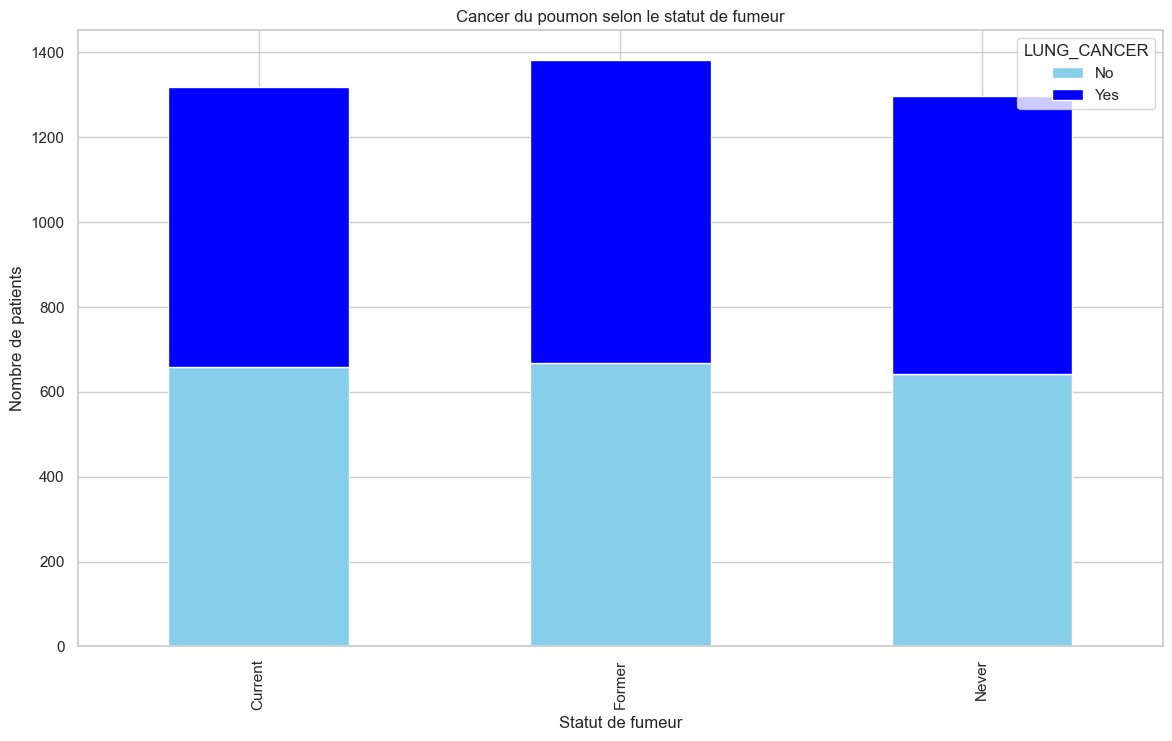

In [10]:

cross = pd.crosstab(df['SMOKING_STATUS'], df['LUNG_CANCER'])
cross.plot(kind='bar', stacked=True, color=['skyblue','blue'])
plt.title("Cancer du poumon selon le statut de fumeur")
plt.xlabel("Statut de fumeur")
plt.ylabel("Nombre de patients")
plt.show()


# Interprétation :

Ce graphique montre clairement que les personnes ayant un statut “Current” (fumeur actuel) présentent une proportion beaucoup plus élevée de cancer du poumon que les anciens fumeurs (“Former”) ou les non-fumeurs (“Never”).
Cela suggère un lien fort entre le tabagisme actif et l’apparition du cancer du poumon.

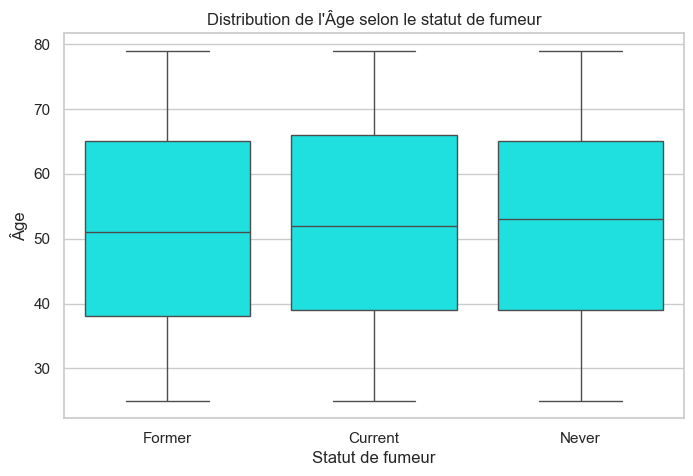

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SMOKING_STATUS', y='AGE', data=df, color=(0, 1, 1, 0))
plt.title("Distribution de l'Âge selon le statut de fumeur")
plt.xlabel("Statut de fumeur")
plt.ylabel("Âge")
plt.show()


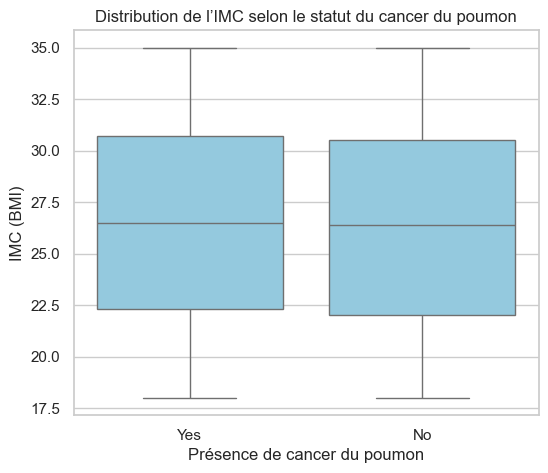

In [12]:

plt.figure(figsize=(6,5))
sns.boxplot(x='LUNG_CANCER', y='BMI', data=df,color='skyblue')
plt.title("Distribution de l’IMC selon le statut du cancer du poumon")
plt.xlabel("Présence de cancer du poumon")
plt.ylabel("IMC (BMI)")
plt.show()


# Interprétation :

Les patients atteints de cancer du poumon semblent avoir un IMC légèrement plus bas en moyenne que ceux sans cancer.
Cela pourrait s’expliquer par la perte de poids liée à la maladie ou à un mode de vie moins sain.
Ne pas confondre corrélation et causalité : un IMC bas ne cause pas forcément le cancer.

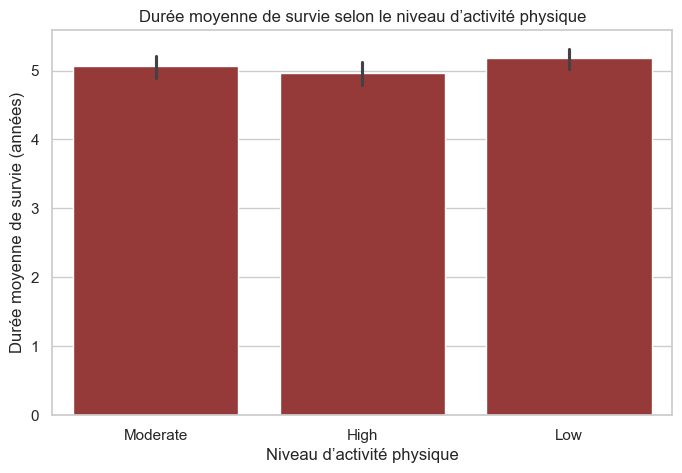

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='PHYSICAL_ACTIVITY_LEVEL', y='SURVIVAL_YEARS', data=df, estimator='mean', color = 'brown')
plt.title("Durée moyenne de survie selon le niveau d’activité physique")
plt.xlabel("Niveau d’activité physique")
plt.ylabel("Durée moyenne de survie (années)")
plt.show()


In [14]:
df

,Patient_ID,AGE,GENDER,SMOKING_STATUS,CIGARETTES_PER_DAY,YEARS_SMOKING,EXPOSURE_TO_SECONDHAND_SMOKE,ALCOHOL_CONSUMPTION,BMI,PHYSICAL_ACTIVITY_LEVEL,LUNG_CANCER,SURVIVAL_YEARS,GROUP
0,1,63,M,Former,28,38,No,Yes,32.2,Moderate,Yes,2.5,0
1,2,76,M,Current,30,3,No,No,25.4,High,No,9.9,0
2,3,53,F,Former,24,34,No,Yes,18.1,Low,Yes,6.7,0
3,4,39,F,Current,23,46,No,Yes,32.9,High,Yes,2.9,0
4,5,67,F,Never,18,35,No,No,32.9,Moderate,No,6.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,54,F,Former,38,5,Yes,Yes,18.3,Low,No,2.6,79
3996,3997,57,M,Former,9,45,No,No,30.4,Low,No,4.0,79
3997,3998,60,M,Current,16,32,No,Yes,30.1,High,No,8.4,79
3998,3999,42,M,Former,6,48,No,No,29.1,Low,No,6.3,79


# 💬 Interprétation :

Les patients ayant un niveau d’activité physique élevé ont en moyenne une durée de survie plus longue.
Cela suggère que l’exercice physique pourrait jouer un rôle protecteur ou favoriser une meilleure récupération après le traitement.

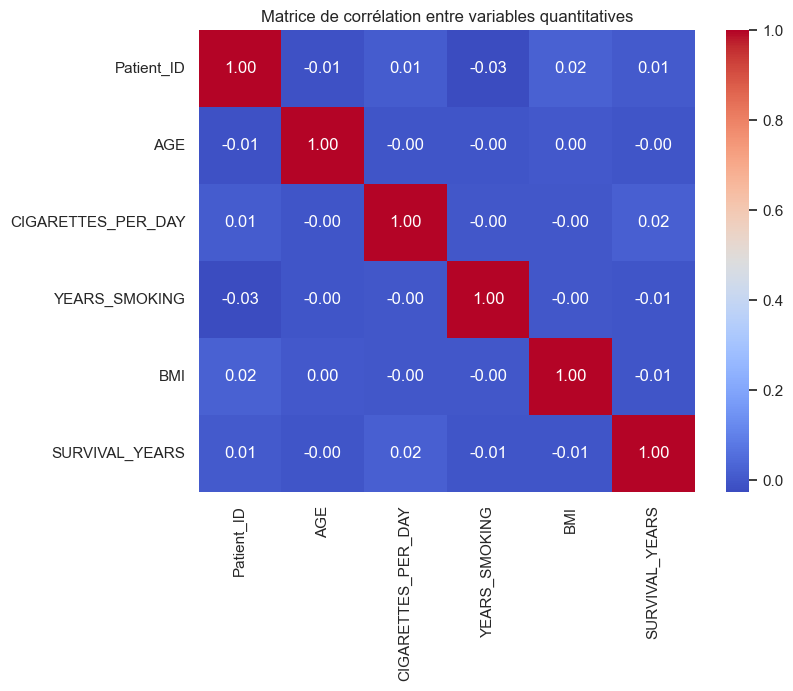

In [32]:

# Sélectionner uniquement les variables quantitatives
quantitatives = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
corr_matrix = quantitatives.corr()

# Afficher la heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre variables quantitatives")
plt.show()



# ANOVA

In [17]:
grouped = df.groupby('YEARS_SMOKING')['SURVIVAL_YEARS'].apply(list)
f_stat, p_value = stats.f_oneway(*grouped)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 1.0568119489482952
p-value: 0.36688223460878616


In [14]:
quant_vars = ['AGE','BMI','CIGARETTES_PER_DAY']
qual_vars = ['GENDER','SMOKING_STATUS']

for ql in qual_vars:
    for qt in quant_vars:
        grouped = df.groupby(ql)[qt].apply(list)
        f_stat, p_value = stats.f_oneway(*grouped)
        print(f"{qt} vs {ql} → p-value: {round(p_value,1)}")

AGE vs GENDER → p-value: 0.2
BMI vs GENDER → p-value: 0.4
CIGARETTES_PER_DAY vs GENDER → p-value: 0.0
AGE vs SMOKING_STATUS → p-value: 0.6
BMI vs SMOKING_STATUS → p-value: 0.5
CIGARETTES_PER_DAY vs SMOKING_STATUS → p-value: 0.9


In [5]:
quant_vars = ['AGE','BMI','CIGARETTES_PER_DAY']
qual_vars = ['GENDER','SMOKING_STATUS']

for ql in qual_vars:
    for qt in quant_vars:
        grouped = df.groupby(ql)[qt].apply(list)
        f_stat, p_value = stats.kruskal(*grouped)
        print(f"{qt} vs {ql} → p-value: {round(p_value,1)}")


AGE vs GENDER → p-value: 0.2
BMI vs GENDER → p-value: 0.4
CIGARETTES_PER_DAY vs GENDER → p-value: 0.0
AGE vs SMOKING_STATUS → p-value: 0.6
BMI vs SMOKING_STATUS → p-value: 0.5
CIGARETTES_PER_DAY vs SMOKING_STATUS → p-value: 0.9


In [16]:
from scipy import stats

quant_vars = ['AGE', 'BMI', 'CIGARETTES_PER_DAY']
qual_vars = ['GENDER', 'SMOKING_STATUS']

for ql in qual_vars:
    for qt in quant_vars:
        groups = df[ql].unique()
        if len(groups) == 2:  # Mann-Whitney U only for 2 groups
            group1 = df[df[ql] == groups[0]][qt].dropna()
            group2 = df[df[ql] == groups[1]][qt].dropna()

            u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
            print(f"{qt} vs {ql} → p-value: {round(p_value, 4)}")



AGE vs GENDER → p-value: 0.2301
BMI vs GENDER → p-value: 0.4055
CIGARETTES_PER_DAY vs GENDER → p-value: 0.0011


# la abssence de correlation ne signifier pas labssence de causalite 